In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!rm -rf ~/.kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c twitter-sentiment-classification-challenge

  0% 0.00/4.38M [00:00<?, ?B/s]
100% 4.38M/4.38M [00:00<00:00, 942MB/s]


In [ ]:
!unzip twitter-sentiment-classification-challenge.zip

Archive:  twitter-sentiment-classification-challenge.zip
  inflating: HW4_test_no-label.csv   
  inflating: HW4_train.csv           


In [ ]:
import pandas as pd
df_train = pd.read_csv('HW4_train.csv', encoding='ISO-8859-1')
df_test = pd.read_csv('HW4_test_no-label.csv', encoding='ISO-8859-1')

In [ ]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df_train.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def clean_text(text):
  if not isinstance(text,str):
    return ""
  text = re.sub(r'http\S+', '', text) # URL 제거(http)
  text = re.sub(r'https\S+', '', text) # URL 제거2(https)
  text = re.sub(r'@\w+', '', text) # 멘션 제거->@ 뒤에 오는 단어 제거
  text = re.sub(r'#','',text) # 해시태그만 제거->해시태그 뒤에 내용은 살리기
  # text = re.sub(r'\d+', '', text) # 숫자 제거
  #text = text.lower() # 소문자로 변환 필요 x->tokenizer는 casing반영되었으므로
  text = re.sub(r'\s+', ' ', text).strip()  # 중복 공백 제거 및 앞뒤 공백 제거
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Data Preprocessing->text cleaning
df_train['OriginalTweet'] = df_train['OriginalTweet'].apply(clean_text)
df_test['OriginalTweet'] = df_test['OriginalTweet'].apply(clean_text)

In [ ]:
print(df_train.head())

   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0                                            and and             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the COVI...  Extremely Negative  


In [ ]:
sentiment_labels = {
    "Extremely Negative":0,
    "Negative":1,
    "Neutral":2,
    "Positive":3,
    "Extremely Positive":4
}

df_train['Sentiment'] = df_train['Sentiment'].map(sentiment_labels)

In [ ]:
#check
df_train['Sentiment'].isna().sum()

np.int64(0)

In [ ]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,and and,2
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,3
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,3
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,3
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the COVI...",0


In [ ]:
##Data imbalance check
##Sentiment label 별 분포 확인
print("----number per each sentiment label----")
print(df_train['Sentiment'].value_counts().sort_index())
print("----proportion----")
print(df_train['Sentiment'].value_counts(normalize=True).sort_index())

----number per each sentiment label----
Sentiment
0     5481
1     9917
2     7713
3    11422
4     6624
Name: count, dtype: int64
----proportion----
Sentiment
0    0.133173
1    0.240955
2    0.187404
3    0.277523
4    0.160945
Name: proportion, dtype: float64


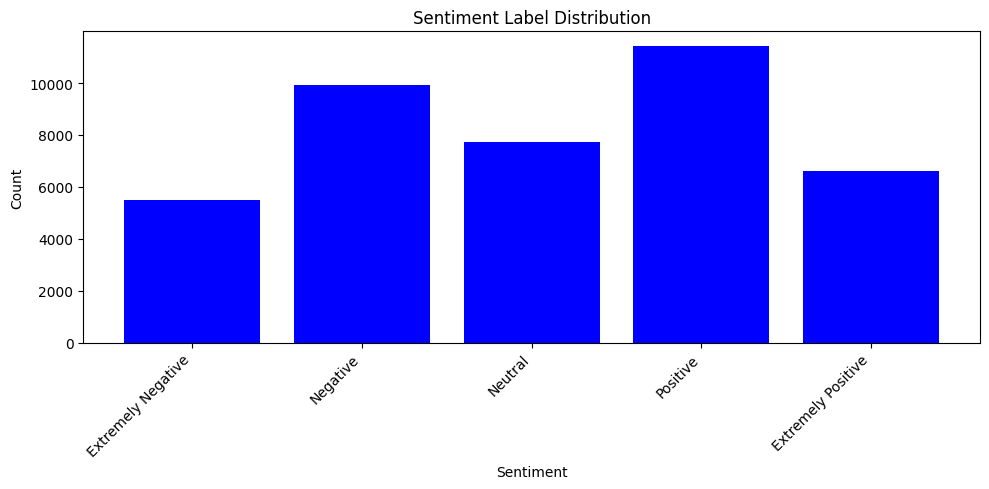

In [ ]:
#visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sent_cnt = df_train['Sentiment'].value_counts().sort_index()
plt.bar(sent_cnt.index,sent_cnt.values,color='blue')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Label Distribution')
plt.xticks(range(5),list(sentiment_labels.keys()), rotation=45, ha='right')
plt.tight_layout()
plt.show()

sentiment label: negative(1)과 postive(3)이 나머지 label에 비해 2배 정도 많음->class imbalance

In [ ]:
df_train = df_train.drop(df_train.columns[0:4], axis=1)
df_train.head()

,OriginalTweet,Sentiment
0,and and,2
1,advice Talk to your neighbours family to excha...,3
2,Coronavirus Australia: Woolworths to give elde...,3
3,My food stock is not the only one which is emp...,3
4,"Me, ready to go at supermarket during the COVI...",0


In [ ]:
df_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...
3,4,44956,Chicagoland,02-03-2020,Panic buying hits NewYork City as anxious shop...
4,5,44957,"Melbourne, Victoria",03-03-2020,toiletpaper dunnypaper coronavirus coronavirus...


In [ ]:
df_test = df_test.drop(df_test.columns[1:4], axis=1)

In [ ]:
df_test.head()

,UserName,OriginalTweet
0,1,TRENDING: New Yorkers encounter empty supermar...
1,2,When I couldn't find hand sanitizer at Fred Me...
2,3,Find out how you can protect yourself and love...
3,4,Panic buying hits NewYork City as anxious shop...
4,5,toiletpaper dunnypaper coronavirus coronavirus...


In [ ]:
##Dataset
from datasets import Dataset
train_dataset = Dataset.from_pandas(df_train).rename_columns({
    "OriginalTweet": "text",
    "Sentiment": "label"
})

test_dataset = Dataset.from_pandas(df_test[['OriginalTweet']]).rename_column(
    "OriginalTweet", "text"
)

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("FacebookAI/roberta-base")
#Define tokenization function
def tokenize(batch):
  return tokenizer(batch["text"],padding=False,truncation=True)
#batch단위로 text column에 있는 값들을 tokenize->input_id, attention_mask 반환
#이때 attention_mask는 패딩 관계 없이 토큰 길이 만큼의 리스트 형태로 반환되고
#padding의 경우 collator에 의해 나중에 해 줄 것이므로 False->encoder의 경우 padding에만 attention masking
#->따라서 여기선 padding 일단 없으므로 [1,1...1,1]

train_dataset = train_dataset.map(
      tokenize,
      batched=True,
      remove_columns=['text']
)
#train_dataset columns:  ['label', 'input_ids', 'attention_mask']

test_dataset = test_dataset.map(
      tokenize,
      batched=True,
      remove_columns=['text']
)
#test_datatset columns: ['input_ids','attention_mask']

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Map:   0%|          | 0/41157 [00:00<?, ? examples/s]

Map:   0%|          | 0/3798 [00:00<?, ? examples/s]

In [ ]:
#Check
print("Train Sample:", train_dataset[0])
print("Test Sample:", test_dataset[0])

#Column
print("Train Columns:", train_dataset.column_names)
print("Test Columns:", test_dataset.column_names)

Train Sample: {'label': 2, 'input_ids': [0, 463, 8, 2], 'attention_mask': [1, 1, 1, 1]}
Test Sample: {'input_ids': [0, 6997, 9309, 1862, 35, 188, 24412, 6376, 5802, 12647, 14169, 36, 7711, 6, 166, 571, 18370, 11, 6314, 238, 1088, 12, 995, 804, 11491, 19528, 36, 29337, 44545, 6, 4471, 46583, 43, 25, 34377, 1469, 19473, 12, 506, 10852, 9456, 388, 62, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
Train Columns: ['label', 'input_ids', 'attention_mask']
Test Columns: ['input_ids', 'attention_mask']


In [ ]:
df = train_dataset.to_pandas()
df.head()

,label,input_ids,attention_mask
0,2,"[0, 463, 8, 2]","[1, 1, 1, 1]"
1,3,"[0, 625, 36237, 10391, 7, 110, 10689, 284, 7, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,3,"[0, 15228, 261, 1469, 19473, 1221, 35, 14924, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,3,"[0, 2387, 689, 388, 16, 45, 5, 129, 65, 61, 16...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,0,"[0, 5096, 6, 1227, 7, 213, 23, 12647, 148, 5, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [ ]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(
    df,
    test_size=0.1,
    stratify=df["label"],
    random_state=224
)

train_dataset = Dataset.from_pandas(train_df.reset_index(drop=True))
val_dataset   = Dataset.from_pandas(val_df.reset_index(drop=True))

In [ ]:
from datasets import Value
train_dataset = train_dataset.cast_column("label", Value("int64"))
val_dataset   = val_dataset.cast_column("label", Value("int64"))

Casting the dataset:   0%|          | 0/37041 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/4116 [00:00<?, ? examples/s]

In [ ]:
train_dataset.set_format(
    type="torch",
    columns=["input_ids", "attention_mask", "label"]
)

val_dataset.set_format(
    type="torch",
    columns=["input_ids", "attention_mask", "label"]
)

test_dataset.set_format(
    type="torch",
    columns=["input_ids", "attention_mask"]
)

In [ ]:
!pip install transformers
!pip install datasets

In [ ]:
import torch
import numpy as np
import json
from transformers import RobertaForSequenceClassification
model = RobertaForSequenceClassification.from_pretrained("FacebookAI/roberta-base",num_labels=5)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import os

%cd /content/drive/MyDrive/nlp
os.makedirs("result", exist_ok=True)

/content/drive/.shortcut-targets-by-id/1304UbG5sjE0nkWfQp6oeKlFYJWfXMaRE/nlp


In [ ]:
from transformers import DataCollatorWithPadding,TrainingArguments,Trainer,TrainerCallback, EarlyStoppingCallback
from sklearn.metrics import f1_score, accuracy_score

#batch 내 sample의 최대 길이에 맞춰서 padding 해주고, attention_mask update(0으로)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

train_args = TrainingArguments(
    output_dir="result",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=20,
    eval_strategy="epoch", # run validation at the end of each epoch
    save_strategy="epoch",
    learning_rate=2e-5,
    load_best_model_at_end=True,
    metric_for_best_model="macro_f1",
    greater_is_better=True,
    seed=224,
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred #(1,5)
    preds = np.argmax(logits, axis=1)

    return {
        "macro_f1": f1_score(labels, preds, average="macro"),
        "accuracy": accuracy_score(labels, preds)
    }


trainer = Trainer(
    model = model,
    args = train_args,
    train_dataset = train_dataset,#train
    eval_dataset =  val_dataset,#val
    tokenizer = tokenizer,
    data_collator = data_collator,
    compute_metrics = compute_metrics,
)
#trainer는 default가 shuffle=True

class LoggingCallback(TrainerCallback):
    def __init__(self, log_path):
        self.log_path = log_path

    def on_log(self, args, state, control, logs=None, **kwargs):
        _ = logs.pop("total_flos", None)
        if state.is_local_process_zero:
            with open(self.log_path, "a") as f:
                f.write(json.dumps(logs) + "\n")


trainer.add_callback(EarlyStoppingCallback(early_stopping_patience=2, early_stopping_threshold=0.0))
trainer.add_callback(LoggingCallback("result/log.jsonl"))

/tmp/ipython-input-1793132495.py:31: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Macro F1,Accuracy
1,0.713800,0.612269,0.787665,0.782556
2,0.510900,0.545647,0.802936,0.796890
3,0.413000,0.514429,0.847839,0.845724
4,0.321600,0.691857,0.809607,0.803207
5,0.281100,0.553755,0.861273,0.857872
6,0.237000,0.592414,0.850592,0.848397
7,0.203400,0.681480,0.844762,0.840622


TrainOutput(global_step=16212, training_loss=0.4030223526897002, metrics={'train_runtime': 3640.0577, 'train_samples_per_second': 203.519, 'train_steps_per_second': 12.725, 'train_loss': 0.4030223526897002, 'epoch': 7.0})

In [ ]:
best_model = trainer.model
best_model.save_pretrained("/content/drive/MyDrive/nlp")

In [ ]:
test_pred = trainer.predict(test_dataset)
logits = test_pred.predictions #(B,5)
pred_ids = np.argmax(logits,axis=1) #(B,1)

In [ ]:
#id를 sent로 변환
id2sent = {id:sent for sent,id in sentiment_labels.items()}
pred_sent = [id2sent[int(i)] for i in pred_ids]

In [ ]:
df_test.head()

,UserName,OriginalTweet
0,1,TRENDING: New Yorkers encounter empty supermar...
1,2,When I couldn't find hand sanitizer at Fred Me...
2,3,Find out how you can protect yourself and love...
3,4,Panic buying hits NewYork City as anxious shop...
4,5,toiletpaper dunnypaper coronavirus coronavirus...


In [ ]:
test_df = pd.DataFrame({
    "UserName":df_test["UserName"],
    "Sentiment":pred_sent
})

In [ ]:
print(test_df.head())

   UserName           Sentiment
0         1            Negative
1         2            Positive
2         3  Extremely Positive
3         4            Negative
4         5             Neutral


In [ ]:
test_df = test_df.set_index("UserName")
test_df.index.name = "UserName"

In [ ]:
test_df.head()

,Sentiment
UserName,
1,Negative
2,Positive
3,Extremely Positive
4,Negative
5,Neutral


In [ ]:
test_df.to_csv('result3.csv')